# Transform data

In [3]:
import pandas as pd 
df = pd.read_csv('./main_df.csv')
df

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World,is_popular
0,00021Wy6AyMbLP2tqij86e,0.2340,0.617,169173,0.862,0.976000,G,0.1410,-12.855,Major,...,0,0,0,0,0,0,0,0,0,0
1,000CzNKC8PEt1yC3L8dqwV,0.2490,0.518,130653,0.805,0.000000,F,0.3330,-6.248,Major,...,0,0,0,0,0,0,0,0,0,0
2,000DfZJww8KiixTKuk9usJ,0.3660,0.631,357573,0.513,0.000004,D,0.1090,-6.376,Major,...,1,0,0,0,0,0,0,0,0,0
3,000EWWBkYaREzsBplYjUag,0.8150,0.768,104924,0.137,0.922000,C#,0.1130,-13.284,Minor,...,0,0,1,0,0,0,0,0,0,0
4,000xQL6tZNLJzIrtIgxqSl,0.1310,0.748,188491,0.627,0.000000,G,0.0852,-6.029,Major,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,7zz7MbCb9G7KJc1NVl9bL0,0.4000,0.851,251267,0.790,0.230000,C,0.1230,-4.641,Minor,...,0,0,1,0,0,0,0,0,0,0
176770,7zzFNNxVD0h0ctAT08H0pa,0.9730,0.538,266933,0.144,0.177000,G#,0.3590,-17.711,Major,...,0,0,1,0,0,0,0,0,0,0
176771,7zzTeItz93lYI52hlcipm5,0.1130,0.716,228493,0.806,0.000000,G,0.1510,-5.913,Minor,...,0,1,0,0,0,0,0,0,0,0
176772,7zzZmpw8L66ZPjH1M6qmOs,0.2170,0.664,267960,0.537,0.000003,D,0.1180,-6.000,Major,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Create an empty dictionary to hold new features
new_features = {}
corr_matrix = df.select_dtypes(include='number').corr()

# Iterate over the correlation matrix to find pairs with high correlation
for col1 in corr_matrix.columns:
    if col1 != 'is_popular':
        for col2 in corr_matrix.columns:
            if col2 != 'is_popular':
                if col1 != col2:
                    corr_value = corr_matrix.at[col1, col2]
                    if abs(corr_value) > 0.2:
                        new_feature_name = f'{col1}_{col2}'
                        if f'{col1}_{col2}' and f'{col2}_{col1}' not in new_features.keys():
                            new_features[new_feature_name] = df[col1] * df[col2]

# Add new features to the original DataFrame
df = df.assign(**new_features)

In [5]:
df.columns

Index(['track_id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'Movie', 'R&B',
       'A Capella', 'Alternative', 'Country', 'Dance', 'Electronic', 'Anime',
       'Folk', 'Blues', 'Opera', 'Hip-Hop', 'Children's Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World', 'is_popular',
       'acousticness_danceability', 'acousticness_energy',
       'acousticness_instrumentalness', 'acousticness_loudness',
       'acousticness_tempo', 'acousticness_valence', 'acousticness_Opera',
       'acousticness_Classical', 'acousticness_Comedy',
       'acousticness_Soundtrack', 'danceability_energy',
       'danceability_instrumentalness', 'danceability_loudness',
       'danceability_valence', 'danceability_Opera', 'danceability_Hip-Hop',
       'danceability_Classical', 'd

In [6]:
#splitting the data
from sklearn.model_selection import train_test_split
y=df['is_popular']
X=df.drop(['is_popular','track_id'],axis=1)


In [7]:
#One hot encoding the dataframes
from sklearn.preprocessing import OneHotEncoder

#define categorical columns
cat_cols = ['key', 'mode', 'time_signature']
encoder=OneHotEncoder(sparse=False, drop='first')
#Training set
data_ohe_train = encoder.fit_transform(X[cat_cols])
df_ohe_train = pd.DataFrame(data_ohe_train, columns=encoder.get_feature_names_out(cat_cols), index=X.index)


c:\Users\ACER\miniconda3\envs\face\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
#merging OHE columns with numerical columns
X_train = pd.concat([X.drop(cat_cols, axis=1), df_ohe_train], axis=1)
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,0.2340,0.617,169173,0.862,0.976000,0.1410,-12.855,0.0514,129.578,0.886,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.2490,0.518,130653,0.805,0.000000,0.3330,-6.248,0.0407,79.124,0.841,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.3660,0.631,357573,0.513,0.000004,0.1090,-6.376,0.0293,120.365,0.307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.8150,0.768,104924,0.137,0.922000,0.1130,-13.284,0.0747,76.430,0.560,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.1310,0.748,188491,0.627,0.000000,0.0852,-6.029,0.0644,120.963,0.524,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,0.4000,0.851,251267,0.790,0.230000,0.1230,-4.641,0.0309,111.993,0.889,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
176770,0.9730,0.538,266933,0.144,0.177000,0.3590,-17.711,0.0569,135.640,0.110,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
176771,0.1130,0.716,228493,0.806,0.000000,0.1510,-5.913,0.1350,136.069,0.544,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
176772,0.2170,0.664,267960,0.537,0.000003,0.1180,-6.000,0.0290,115.049,0.221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
df_ohe = pd.concat([X, y], axis=1)

# Get model's important features

In [10]:
import pickle
with open('model_rf.pkl', 'rb') as f:
    clf_rf = pickle.load(f)


In [11]:

#accessing feature importance values of the tuned random forest model and sorting them
rf_importances_df = pd.Series(clf_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
#parsing the series to a dataframe
rf_importances_df = rf_importances_df.reset_index()
rf_importances_df.columns = ['RF-Attribute', 'RF-Importance']
rf_importances_df[:20]

,RF-Attribute,RF-Importance
0,Pop,0.141256
1,Rock,0.078433
2,Rap,0.037788
3,Dance,0.027371
4,loudness,0.024543
5,acousticness,0.021954
6,duration_ms,0.021554
7,speechiness,0.020490
8,liveness_speechiness,0.019677
9,danceability,0.019404


In [12]:
with open('model_xgb.pkl', 'rb') as f:
    clf_xgb = pickle.load(f)
#parsing feature importances to a series and sorting
xgb_importances_df = pd.Series(clf_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
#parsing the series to a dataframe
xgb_importances_df = xgb_importances_df.reset_index()
xgb_importances_df.columns=['XGB-Attribute', 'XGB-Importance']
xgb_importances_df

,XGB-Attribute,XGB-Importance
0,Pop,0.534043
1,Rock,0.082782
2,Rap,0.046778
3,Dance,0.024149
4,Hip-Hop,0.020523
...,...,...
100,speechiness_Comedy,0.000000
101,liveness_Comedy,0.000000
102,valence_Opera,0.000000
103,energy_Opera,0.000000


In [13]:
with open('model_clf.pkl', 'rb') as f:
    clf_logregcv_tuned = pickle.load(f)
#accessing feature importance values of the tuned logistic regression model and sorting them
logregcv_importances_df = pd.Series(clf_logregcv_tuned.coef_[0], index=X_train.columns).sort_values(ascending=False)
#parsing the series to a dataframe
logregcv_importances_df = logregcv_importances_df.reset_index()
logregcv_importances_df.columns = ['LogReg-Attribute', 'LogReg-Importance']
logregcv_importances_df

,LogReg-Attribute,LogReg-Importance
0,Pop,0.534197
1,Rock,0.431747
2,Rap,0.215637
3,Dance,0.207496
4,Indie,0.141483
...,...,...
100,energy_Ska,-0.081263
101,Blues,-0.083451
102,World,-0.083734
103,Movie,-0.114025


In [14]:
#Concatenating feature importances into a single dataframe
importances_df = pd.concat([rf_importances_df, xgb_importances_df, logregcv_importances_df], axis=1)
importances_df.head(20)

,RF-Attribute,RF-Importance,XGB-Attribute,XGB-Importance,LogReg-Attribute,LogReg-Importance
0,Pop,0.141256,Pop,0.534043,Pop,0.534197
1,Rock,0.078433,Rock,0.082782,Rock,0.431747
2,Rap,0.037788,Rap,0.046778,Rap,0.215637
3,Dance,0.027371,Dance,0.024149,Dance,0.207496
4,loudness,0.024543,Hip-Hop,0.020523,Indie,0.141483
5,acousticness,0.021954,Reggaeton,0.020144,danceability_Hip-Hop,0.118145
6,duration_ms,0.021554,Comedy,0.016788,Hip-Hop,0.114661
7,speechiness,0.020490,Opera,0.016095,Dance_Pop,0.104975
8,liveness_speechiness,0.019677,Indie,0.015497,Alternative,0.094186
9,danceability,0.019404,Anime,0.014453,Rap_Pop,0.083706


# Top 10 featrues imporants

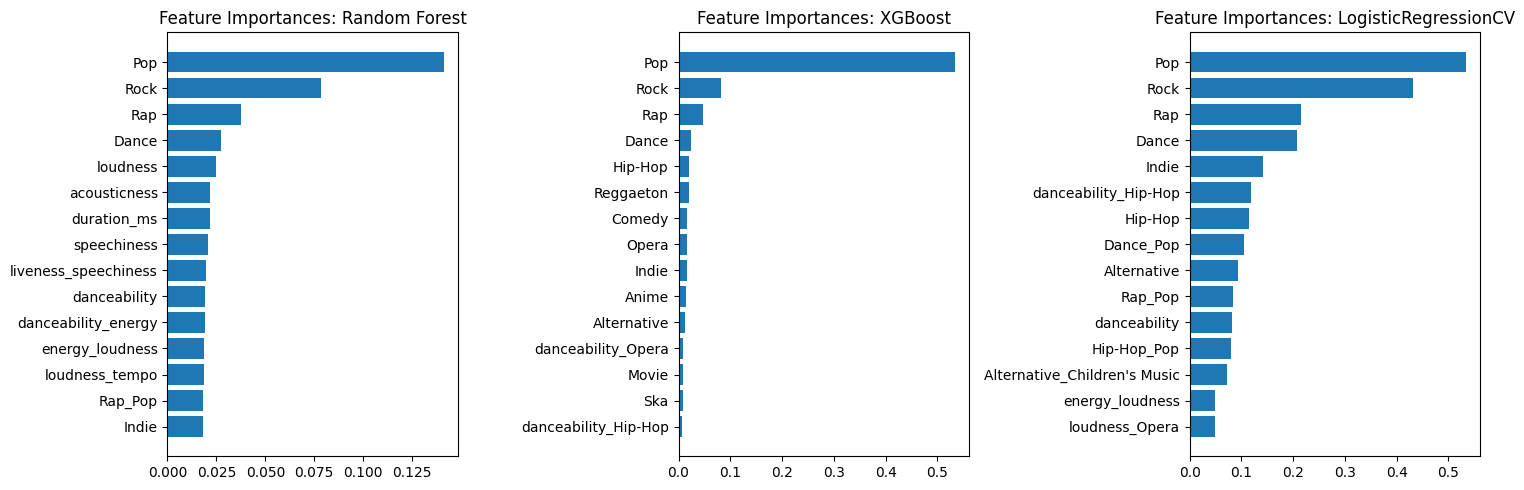

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#plotting feature importances for all models for comparison

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

rf_importances_df = rf_importances_df.sort_values(by='RF-Importance', ascending=True).tail(15)
ax[0].barh(rf_importances_df['RF-Attribute'], rf_importances_df['RF-Importance'])
ax[0].set_title('Feature Importances: Random Forest')

xgb_importances_df = xgb_importances_df.sort_values(by='XGB-Importance', ascending=True).tail(15)
ax[1].barh(xgb_importances_df['XGB-Attribute'], xgb_importances_df['XGB-Importance'])
ax[1].set_title('Feature Importances: XGBoost')

logregcv_importances_df = logregcv_importances_df.sort_values(by='LogReg-Importance', ascending=True).tail(15)
ax[2].barh(logregcv_importances_df['LogReg-Attribute'], logregcv_importances_df['LogReg-Importance'])
ax[2].set_title('Feature Importances: LogisticRegressionCV')
plt.tight_layout()

Among the three models we built with their features important, it's clear that the genre of a song has the most significant impact on its popularity. In each model, songs with the Pop genre stood out as having the greatest influence on popularity. This makes sense, as Pop songs are inherently designed to be popular.

# Acousticness and Danceability in popular - unpopular songs

In [16]:
#separating popular and unpopular songs to two dfs
popular_songs_df = df_ohe[df_ohe['is_popular'] == 1]
unpopular_songs_df = df_ohe[df_ohe['is_popular']==0]

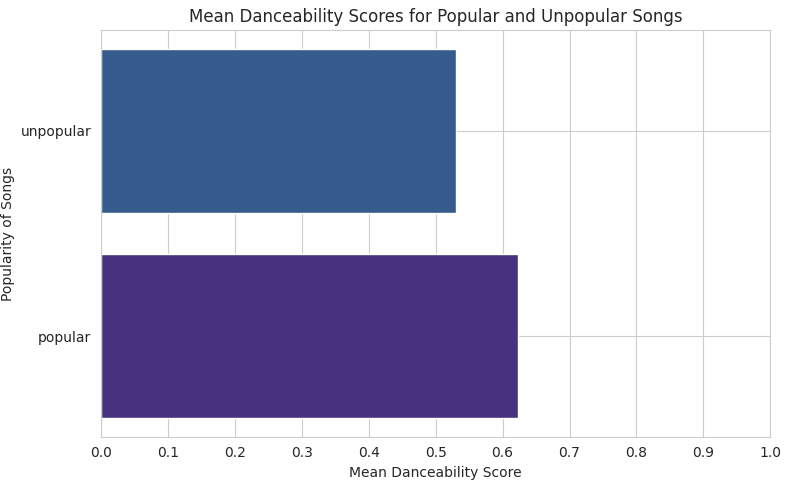

In [17]:
#storing mean danceability scores in dict
mean_danceability = {'popular': popular_songs_df['danceability'].mean(), 
                     'unpopular': unpopular_songs_df['danceability'].mean()}

#visualizing mean scores
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(y=list(mean_danceability.keys()), 
            width=list(mean_danceability.values()), 
            color=[sns.color_palette('viridis')[0],sns.color_palette('viridis')[1]]) 
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0,1.1,0.1))
    ax.set_ylabel('Popularity of Songs')
    ax.set_xlabel('Mean Danceability Score')
    ax.set_title('Mean Danceability Scores for Popular and Unpopular Songs')
    plt.tight_layout()

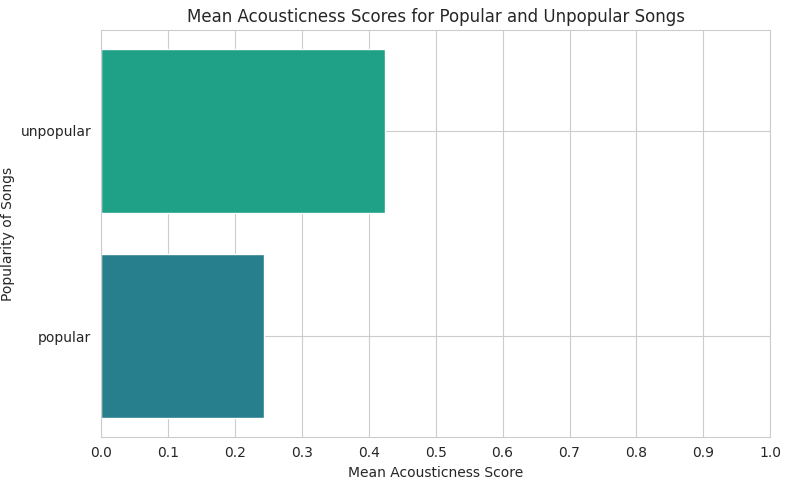

In [18]:
#storing mean acousticness scores in dict
mean_acousticness = {'popular': popular_songs_df['acousticness'].mean(), 
                     'unpopular': unpopular_songs_df['acousticness'].mean()}

#visualizing mean scores
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(y=list(mean_acousticness.keys()), 
            width=list(mean_acousticness.values()), 
            color=[sns.color_palette('viridis')[2],sns.color_palette('viridis')[3]]) 
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0,1.1,0.1))
    ax.set_ylabel('Popularity of Songs')
    ax.set_xlabel('Mean Acousticness Score')
    ax.set_title('Mean Acousticness Scores for Popular and Unpopular Songs')
    plt.tight_layout()

Above, it is clear that the popular songs tended to have a higher danceability and less Acousticness  score compared to unpopular songs. This makes sense since the most frequent genres we explored tend to also be energetic genres.